# Draw Mobius Ring
## Dependencies
- numpy
- sympy
- matplotlib

In [1]:
import numpy as np
from sympy import *
from sympy.abc import r,theta,beta,omega,pi,x,y,z
from sympy.plotting import plot3d_parametric_surface
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

## Math Expression
### Symbolic Representation
#### 参量
* $\theta$: 方向角
* $\omega$: 中环距
#### 变量
* $\beta$:  倾斜角
* r:        环心半径
#### 常数
* R:        环带半径
* W:        环带宽度
### Analytic Expression
$$
\begin{cases}
x=(r+\omega\cos(\frac{\theta}2))\cos(\theta)\\
y=(r+\omega\cos(\frac{\theta}2))\sin(\theta)\\
z=\omega\sin(\frac{\theta}2)
\end{cases}
s.t.
\begin{cases}
\theta\in[0,2\pi]\\
\omega\in[-\frac W2,\frac W2]
\end{cases}
$$

1. Define analysis expression

In [2]:
x_expr = (r+omega*cos(beta))*cos(theta)
y_expr = (r+omega*cos(beta))*sin(theta)
z_expr = omega*sin(beta)
Eq((x,y,z),(x_expr,y_expr,z_expr))

Eq((x, y, z), ((omega*cos(beta) + r)*cos(theta), (omega*cos(beta) + r)*sin(theta), omega*sin(beta)))

In [3]:
beta_expr = theta/2
Eq(beta,beta_expr)

Eq(beta, theta/2)

In [4]:
Eq((x,y,z),tuple(map(lambda expr:expr.subs(beta,beta_expr),(x_expr,y_expr,z_expr))))

Eq((x, y, z), ((omega*cos(theta/2) + r)*cos(theta), (omega*cos(theta/2) + r)*sin(theta), omega*sin(theta/2)))

2. Set Parameter

In [9]:
R = 10
W = 10
a = 36
b = 20

3. Calculate it

In [10]:
theta_range = np.linspace(0,2*np.pi,a)
omega_range = np.linspace(-W/2,W/2,b)
theta_mesh,omega_mesh = np.meshgrid(theta_range,omega_range)

In [11]:
X_expr,Y_expr,Z_expr = map(lambda expr:expr.subs([(beta,beta_expr),(r,R)]),(x_expr,y_expr,z_expr))

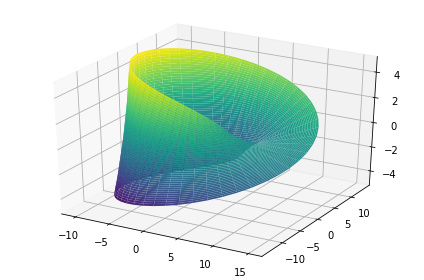

In [18]:
plot3d_parametric_surface(X_expr,Y_expr,Z_expr,(theta,0,2*np.pi),(omega,-W/2,W/2))

In [10]:
X,Y,Z = map(lambda expr:lambdify([theta,omega],expr,'numpy')(theta_mesh,omega_mesh),(X_expr,Y_expr,Z_expr))

4. Draw it

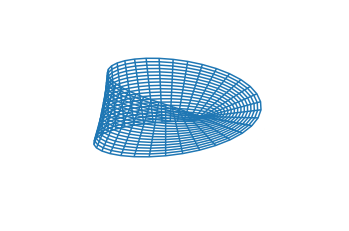

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.set_zlim(-.8*W,.8*W)
plt.axis('off')

ax.plot_wireframe(X,Y,Z)